In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create some distributions

N = 10001
nbins = 30

dist1 = np.random.randn(N)  - 1
dist2 = 3*np.random.randn(N)  
dist3 = np.random.randn(N)  + 1

y1, x1 = np.histogram(dist1, nbins)
x1 = (x1[1:]+x1[:-1])/2

y2, x2 = np.histogram(dist2, nbins)
x2 = (x2[1:]+x2[:-1])/2

y3, x3 = np.histogram(dist3, nbins)
x3 = (x3[1:]+x3[:-1])/2

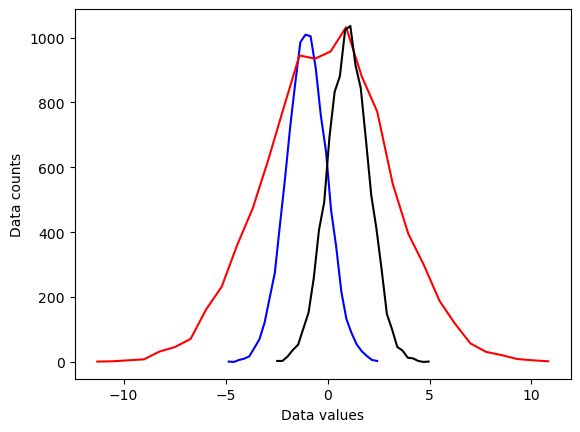

In [3]:
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [4]:
meanval = 10.2
stdval  = 7.5
numsamp = 123

# this 
np.random.normal(meanval,stdval,numsamp)

# is equivialent to this
np.random.randn(numsamp)*stdval + meanval

array([11.48927566,  9.02629992, 14.74703265, -0.88265222,  3.3196901 ,
       18.40449317, 11.57865295, -0.93418264,  3.54596189, 15.36090451,
       13.99871149,  4.58557084,  5.58406905,  7.06544112,  6.02099922,
        4.73826164, 15.5406719 ,  3.69153455, 17.80310654,  1.67255995,
       -8.10215424, 13.29841138, 18.0045376 , 10.99068853, 14.63623021,
       11.58814372, 22.14371817,  4.12792969,  4.30630582, 19.12369301,
        8.48166334, 21.44965221,  5.77471144, 14.53658432, 14.55506797,
       12.97929226, 15.63090905, 17.71218138, 13.41348992, 14.61483747,
        3.27448063, 18.93125007,  6.65102551, 15.79881795, 14.27045151,
        0.33649505, 14.4170162 ,  8.48528559, 11.47033638, -1.15028366,
       13.82915196, 15.62073073, 18.46690859,  8.39208133, 19.81019593,
       18.5988049 , 14.51543969,  6.28908332, 19.62126543, 14.07033385,
        1.25910939, 13.88192148, 21.85221681, 12.99895849, 17.77751524,
        1.45020839, 16.8167159 ,  5.39794687,  1.87534793,  9.11

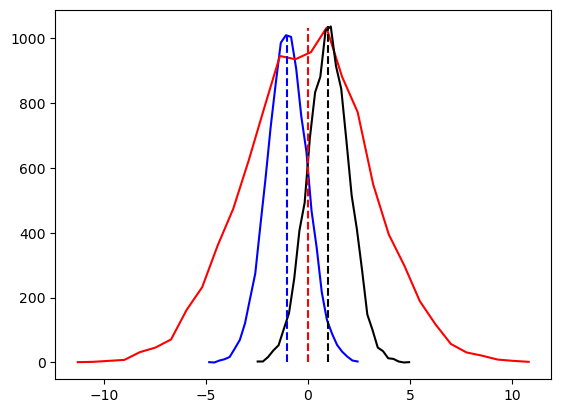

In [6]:
## overlay the mean

mean_d1 = sum(dist1) / len(dist1)
mean_d2 = np.mean(dist2)
mean_d3 = np.mean(dist3)

# plot 
plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_d1,mean_d1], [0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2], [0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3], [0,max(y3)],'k--')




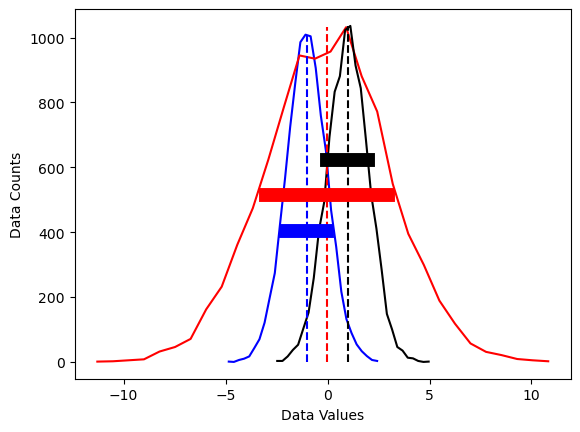

In [14]:
## standard deviation

stds = np.zeros(3)

stds[0] = np.std(dist1,ddof=1)
stds[1] = np.std(dist2,ddof=1)
stds[2] = np.std(dist3,ddof=1)

plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_d1,mean_d1], [0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2], [0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3], [0,max(y3)],'k--')

# stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]], [.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]], [.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]], [.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data Values')
plt.ylabel('Data Counts')
plt.show()

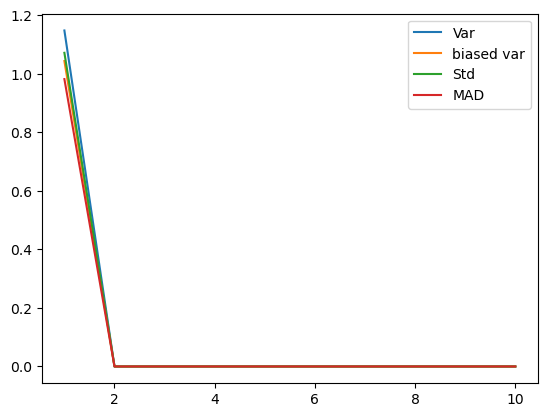

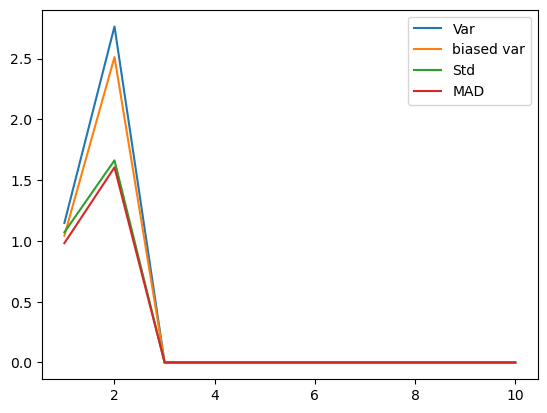

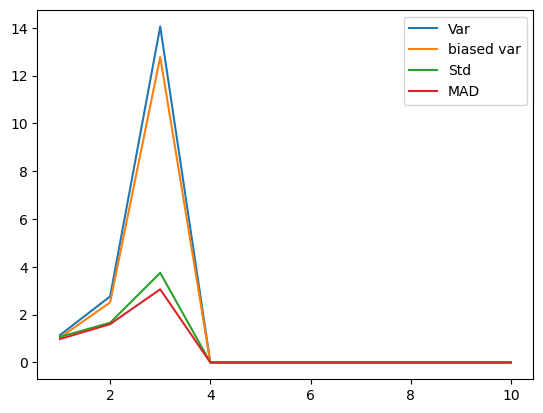

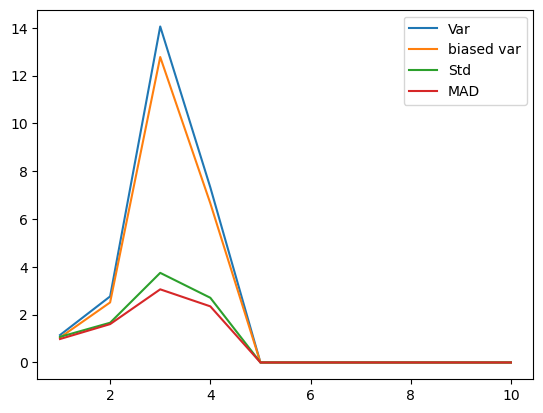

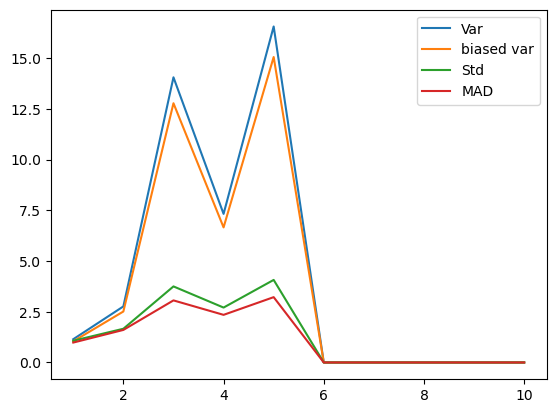

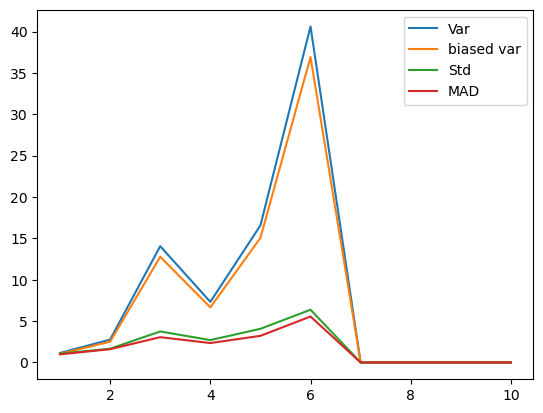

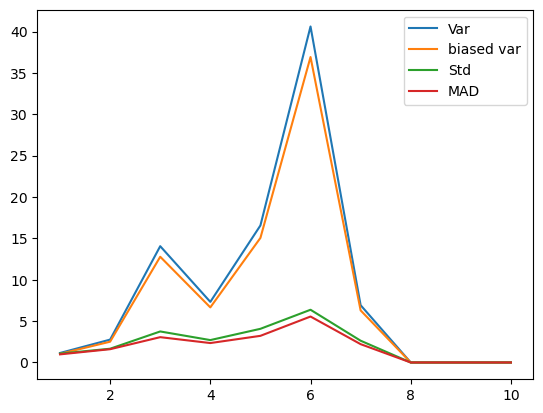

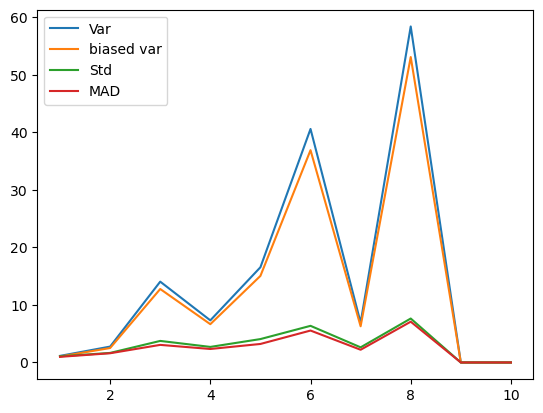

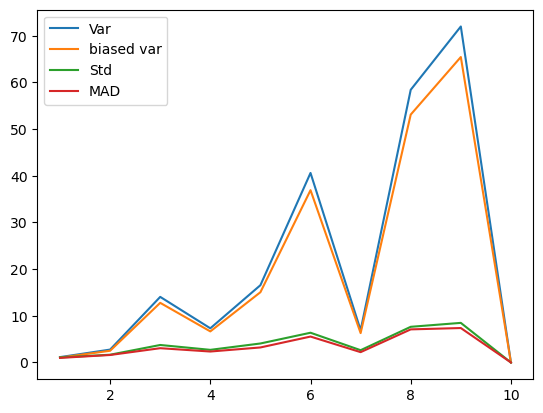

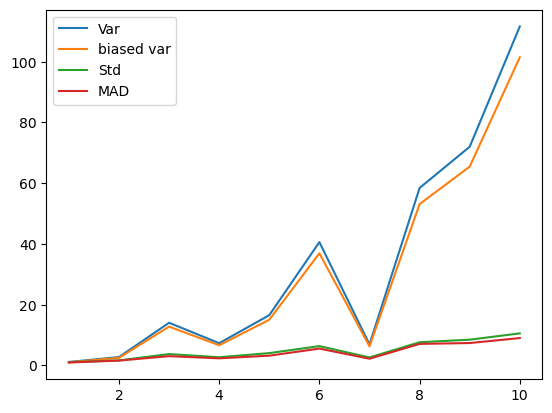

In [18]:
## different variance means
variances = np.arange(1,11)
N = 11

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    # data
    data = np.random.randn(N) * variances[i]
    data_cen = data - np.mean(data)
    
    # varicance
    varmeasures[0,i] = sum(data_cen**2) / (N-1)
    
    # "biased" variance 
    varmeasures[1, i] = sum(data_cen**2) / N
    
    # standard deviation
    varmeasures[2,i] = np.sqrt(sum(data_cen**2) / (N-1))
    
    # mean absolute difference MAD
    varmeasures[3,i] = sum(abs(data_cen)) / (N-1)
    
    # plot
    
    plt.plot(variances, varmeasures.T)
    plt.legend(('Var', 'biased var', 'Std', 'MAD'))
    plt.show()


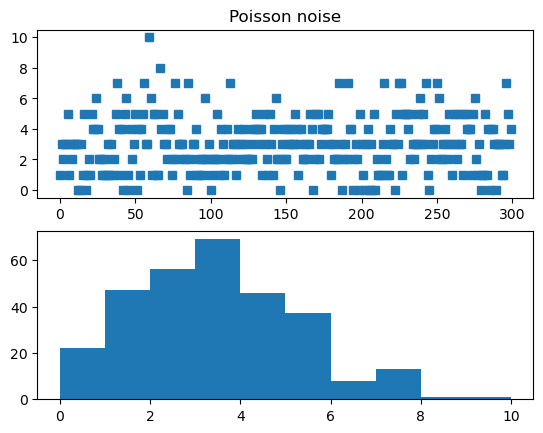

In [21]:
## Fano factor and coefficient of variation

# positive valued data
data = np.random.poisson(3,300) # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

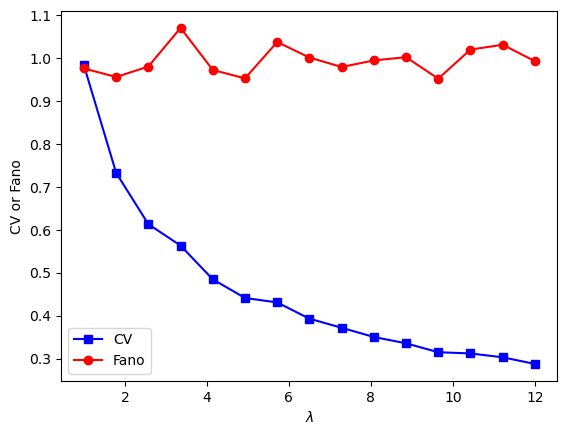

In [32]:
## compute fano factor and CV for a range of Lambda parameters

# params 
lambdas = np.linspace(1,12,15)

# output vectors 
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # new data
    data = np.random.poisson(lambdas[li], 1000)
    
    # compute metrics 
    cv[li]   = np.std(data) / np.mean(data) # ddof?
    fano[li] = np.var(data) / np.mean(data)
    
labels = ['CV', 'Fano']

plt.plot(lambdas, cv, 'bs-')
plt.plot(lambdas, fano, 'ro-')
plt.legend(labels=labels, loc='lower left')
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()


    
